In [18]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.backend import clear_session


from tensorflow.keras.models import Sequential, load_model


from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta

from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

%matplotlib inline 

In [19]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
x_train10.shape, y_train10.shape, x_test10.shape, y_test10.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [20]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

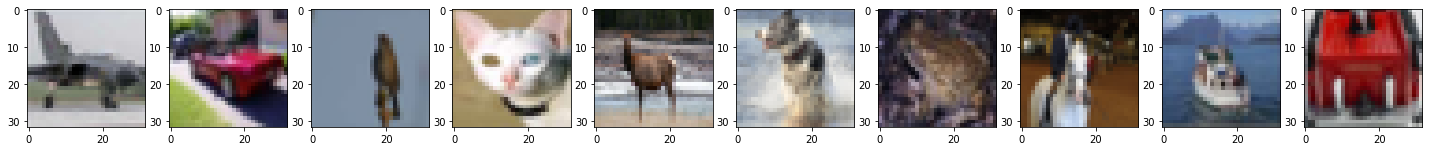

In [21]:
fig, axs = plt.subplots(1,10, figsize = (25,3))
for i in range(10):
  label_ind = np.where(y_train10 == i)[0]
  ind = np.random.choice(label_ind)
  img = x_train10[ind]
  axs[i].imshow(Image.fromarray(img));

In [22]:
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

Epoch 1/15
782/782 [==============================] - 32s 40ms/step - loss: 1.5212 - accuracy: 0.4406 - val_loss: 1.1781 - val_accuracy: 0.5912
Epoch 2/15
782/782 [==============================] - 29s 37ms/step - loss: 1.0881 - accuracy: 0.6218 - val_loss: 0.9424 - val_accuracy: 0.6829
Epoch 3/15
782/782 [==============================] - 29s 37ms/step - loss: 0.9166 - accuracy: 0.6884 - val_loss: 0.9009 - val_accuracy: 0.7031
Epoch 4/15
782/782 [==============================] - 29s 37ms/step - loss: 0.8071 - accuracy: 0.7274 - val_loss: 0.7795 - val_accuracy: 0.7409
Epoch 5/15
782/782 [==============================] - 29s 37ms/step - loss: 0.7329 - accuracy: 0.7556 - val_loss: 0.6978 - val_accuracy: 0.7660
Epoch 6/15
782/782 [==============================] - 29s 37ms/step - loss: 0.6808 - accuracy: 0.7739 - val_loss: 0.6676 - val_accuracy: 0.7874
Epoch 7/15
782/782 [==============================] - 30s 38ms/step - loss: 0.6312 - accuracy: 0.7915 - val_loss: 0.7009 - val_accuracy:

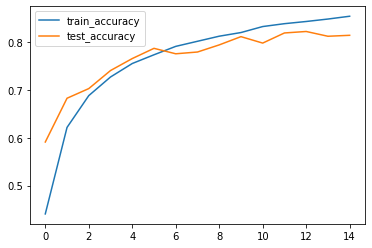

In [24]:
%%time

model = Sequential()
model.add(BatchNormalization(input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

result = model.fit(x_train10, y_train10, batch_size = 64, epochs = 15, validation_data = (x_test10, y_test10), verbose = 1)

plt.plot(result.history['accuracy'], label = 'train_accuracy')
plt.plot(result.history['val_accuracy'], label = 'test_accuracy')
plt.legend();

Epoch 1/5
1563/1563 [==============================] - 49s 30ms/step - loss: 0.4036 - accuracy: 0.8668 - val_loss: 0.5554 - val_accuracy: 0.8321
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.3830 - accuracy: 0.8749 - val_loss: 0.5906 - val_accuracy: 0.8282
Epoch 3/5
1563/1563 [==============================] - 46s 30ms/step - loss: 0.3654 - accuracy: 0.8807 - val_loss: 0.5846 - val_accuracy: 0.8383
Epoch 4/5
1563/1563 [==============================] - 46s 30ms/step - loss: 0.3539 - accuracy: 0.8847 - val_loss: 0.5489 - val_accuracy: 0.8443
Epoch 5/5
1563/1563 [==============================] - 46s 30ms/step - loss: 0.3429 - accuracy: 0.8884 - val_loss: 0.5754 - val_accuracy: 0.8421
CPU times: user 3min 26s, sys: 10.3 s, total: 3min 36s
Wall time: 4min 24s


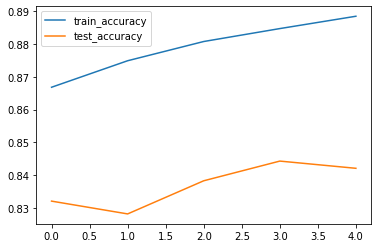

In [25]:
%%time
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0005), metrics = ['accuracy'])
result = model.fit(x_train10, y_train10, batch_size = 32, epochs = 5, validation_data = (x_test10, y_test10), verbose = 1)
plt.plot(result.history['accuracy'], label = 'train_accuracy')
plt.plot(result.history['val_accuracy'], label = 'test_accuracy')
plt.legend();

Epoch 1/3
3125/3125 [==============================] - 94s 30ms/step - loss: 0.2964 - accuracy: 0.9023 - val_loss: 0.5562 - val_accuracy: 0.8521
Epoch 2/3
3125/3125 [==============================] - 78s 25ms/step - loss: 0.2672 - accuracy: 0.9124 - val_loss: 0.5368 - val_accuracy: 0.8561
Epoch 3/3
3125/3125 [==============================] - 79s 25ms/step - loss: 0.2608 - accuracy: 0.9142 - val_loss: 0.5118 - val_accuracy: 0.8548
CPU times: user 4min 10s, sys: 9.51 s, total: 4min 19s
Wall time: 4min 10s


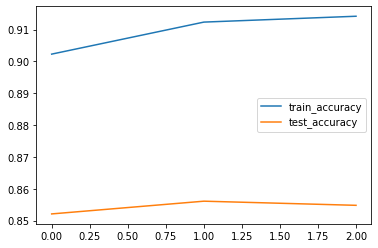

In [26]:
%%time

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics = ['accuracy'])
result = model.fit(x_train10, y_train10, batch_size = 16, epochs = 3, validation_data = (x_test10, y_test10), verbose = 1)
plt.plot(result.history['accuracy'], label = 'train_accuracy')
plt.plot(result.history['val_accuracy'], label = 'test_accuracy')
plt.legend();

In [ ]:
%%time

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.00001), metrics = ['accuracy'])
result = model.fit(x_train10, y_train10, batch_size = 8, epochs = 3, validation_data = (x_test10, y_test10), verbose = 1)
plt.plot(result.history['accuracy'], label = 'train_accuracy')
plt.plot(result.history['val_accuracy'], label = 'test_accuracy')
plt.legend();

Epoch 1/3
6250/6250 [==============================] - 125s 20ms/step - loss: 0.2891 - accuracy: 0.9057 - val_loss: 0.5514 - val_accuracy: 0.8559
Epoch 2/3
6250/6250 [==============================] - 123s 20ms/step - loss: 0.2829 - accuracy: 0.9089 - val_loss: 0.5487 - val_accuracy: 0.8563
Epoch 3/3
2048/6250 [========>.....................] - ETA: 1:15 - loss: 0.2713 - accuracy: 0.9092

In [ ]:
model.save('cifar_10.h5')

In [ ]:
y_pred = model.predict(x_test10)

In [ ]:
for i in range(50):
  n = np.random.randint(x_test10.shape[0])
  plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
  plt.show()
  print(f'Распознала нейронка: {classes[np.argmax(y_pred[n])]}, на самом деле: {classes[np.argmax(y_test10[n])]}')

In [ ]:
!wget 'https://github.com/a18091986/MachineLearning/raw/main/Datasets/For%20CNN_cifar_10_test/real_images.zip' -O real_images.zip
!unzip 'real_images.zip' -d real_images


xTestReal = []
yTestReal = []

for i in range(10):
  for root, dirs, files in os.walk(f"real_images/{i}"):
    for file in files:
      img_path = f'real_images/{i}/{file}'
      xTestReal.append(np.asarray(image.load_img(img_path, grayscale = False, target_size = (32,32))))
      yTestReal.append(i)

xTestReal = np.array(xTestReal)
yTestReal = np.array(yTestReal)

xTestReal.shape, yTestReal.shape, yTestReal

In [ ]:
model = load_model('cifar_10.h5')

In [ ]:
y_pred = model.predict(xTestReal)

In [ ]:
count = 0
for i in range(20):
  plt.imshow(Image.fromarray(xTestReal[i]).convert('RGBA'))
  plt.show()
  print(f'Распознала нейронка: {classes[np.argmax(y_pred[i])]}, на самом деле: {classes[yTestReal[i]]}')
  if np.argmax(y_pred[i]) == yTestReal[i]:
    count +=1 


In [ ]:
print(f'Accuracy: {count/20}')